# Titanic


> ref. https://www.kaggle.com/c/titanic/

> ref. https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html

# Problem

`타이타닉호 침몰 사고` 당시 탑승자들의 정보를 활용하여 생존자를 예측하라.

# Data Dictionary

|Variable|Definition|Key|
|------|---|---|
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex|
|Age|Age in years|
|SibSp| # of siblings / spouses aboard the Titanic|
|Parch| # of parents / children aboard the Titanic|
|Ticket|Ticket number|
|Fare|Passenger fare|
|Cabin|Cabin number|
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

# Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Stage I

## import

In [2]:
import numpy as np
import pandas as pd

## code

In [3]:
import os

print(os.getcwd())

C:\Users\godgk\Desktop\Project\kaggle\Titanic


In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('train data shape', train.shape)
print('test data shape', test.shape)
print('-----[train infomation]-----')
print(train.info())
print('-----[test infomation]-----')
print(test.info())

train data shape (891, 12)
test data shape (418, 11)
-----[train infomation]-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----[test infomation]-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Nu

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Stage II

## import

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [50]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
    
    plt.show()

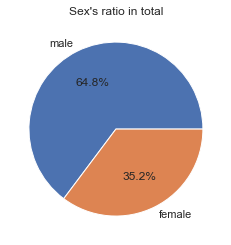

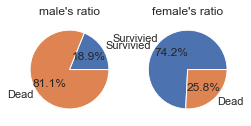

In [51]:
pie_chart("Sex")

- 남성 탑승객이 여성 탑승객보다 많다.

- 여성 탑승객의 생존 비율이 남성 탑승객보다 높다.

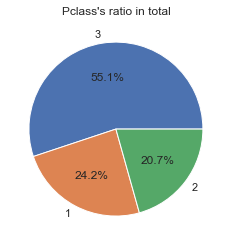

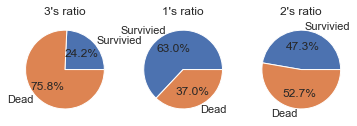

In [12]:
pie_chart("Pclass")

- 1등실 2등실 3등실 순으로 생존 비율이 높다.

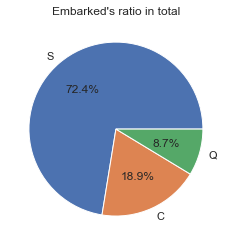

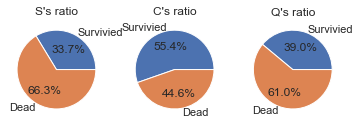

In [13]:
pie_chart("Embarked")

# Stage 3

In [44]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

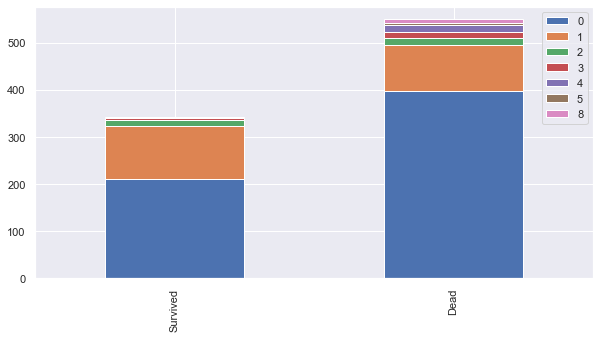

In [48]:
bar_chart("SibSp")

In [55]:
survived = train[train['Survived'] == 1]["SibSp"].value_counts()
dead = train[train['Survived'] == 0]["SibSp"].value_counts()

In [56]:
survived

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [60]:
sum(survived + dead)

nan

In [62]:
dead

0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64

In [63]:
survived + dead

0    608.0
1    209.0
2     28.0
3     16.0
4     18.0
5      NaN
8      NaN
Name: SibSp, dtype: float64

In [64]:
df = pd.DataFrame([survived, dead])

In [65]:
df

,0,1,2,3,4,5,8
SibSp,210.0,112.0,13.0,4.0,3.0,NaN,NaN
SibSp,398.0,97.0,15.0,12.0,15.0,5.0,7.0


In [66]:
df.index = ['Survived', 'Dead']

In [68]:
df

,0,1,2,3,4,5,8
Survived,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


In [73]:
df.loc[len(df)] = df

ValueError: cannot set a row with mismatched columns

In [106]:
df[1]

Survived    112.0
Dead         97.0
Name: 1, dtype: float64

In [122]:
dates = pd.date_range('20130101', periods=6)

In [120]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08'],
              dtype='datetime64[ns]', freq='D')

In [112]:
df = pd.dataFrame(np.random.randn(6,4), index = dates, 

DatetimeIndex(['2001-11-20', '2001-11-21', '2001-11-22', '2001-11-23',
               '2001-11-24', '2001-11-25'],
              dtype='datetime64[ns]', freq='D')